In this assignment, you'll continue working with the Students Performance in Exams dataset from Kaggle. You can access the data from the Thinkful database.

Here are the credentials you can use to connect to the database:

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df=pd.read_sql_query('SELECT * FROM studentsperformance',con=engine)

engine.dispose()

To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

In [4]:
education_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Text(0.5, 1.0, 'writing score before transforming')

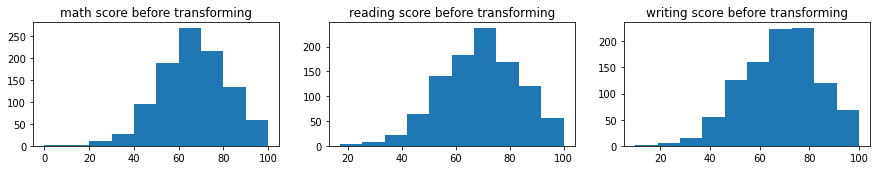

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(2,3,1)
plt.hist(education_df['math score'])
plt.title('math score before transforming')

plt.subplot(2,3,2)
plt.hist(education_df['reading score'])
plt.title('reading score before transforming')

plt.subplot(2,3,3)
plt.hist(education_df['writing score'])
plt.title('writing score before transforming')



Text(0.5, 1.0, 'boxcox math score')

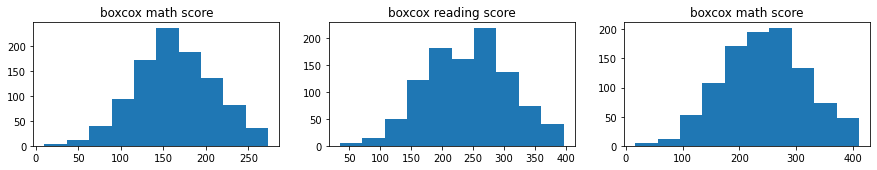

In [14]:
from scipy.stats import boxcox



boxcox_mathscore,_ = boxcox(education_df[education_df['math score']>0]['math score'])
boxcox_readingscore,_ = boxcox(education_df['reading score'])
boxcox_writingscore,_= boxcox(education_df['writing score'])

plt.figure(figsize=(15,5))
plt.subplot(2,3,1)
plt.hist(boxcox_mathscore )
plt.title('boxcox math score')

plt.subplot(2,3,2)
plt.hist(boxcox_readingscore)
plt.title('boxcox reading score')

plt.subplot(2,3,3)
plt.hist(boxcox_writingscore)
plt.title('boxcox math score')

In [17]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jarque_bera_test_stats=jarque_bera(education_df['math score'])
normaltest_test_stats=normaltest(education_df['math score'])

print('jarque_bera statistic value for math score is {} and p value is {}'.format(jarque_bera_test_stats[0],jarque_bera_test_stats[1]))
print('jarque_bera statistic value for math score is {} and p value is {}'.format(normaltest_test_stats[0],normaltest_test_stats[1]))


jarque_bera_test_stats=jarque_bera(education_df['reading score'])
normaltest_test_stats=normaltest(education_df['reading score'])

print('jarque_bera statistic value for reading score is {} and p value is {}'.format(jarque_bera_test_stats[0],jarque_bera_test_stats[1]))
print('jarque_bera statistic value for reading score is {} and p value is {}'.format(normaltest_test_stats[0],normaltest_test_stats[1]))

jarque_bera_test_stats=jarque_bera(education_df['writing score'])
normaltest_test_stats=normaltest(education_df['writing score'])

print('jarque_bera statistic value for writing score is {} and p value is {}'.format(jarque_bera_test_stats[0],jarque_bera_test_stats[1]))
print('jarque_bera statistic value for writing score is {} and p value is {}'.format(normaltest_test_stats[0],normaltest_test_stats[1]))

jarque_bera statistic value for math score is 15.912256686712709 and p value is 0.0003505075386818213
jarque_bera statistic value for math score is 15.408960513931822 and p value is 0.00045080293869937836
jarque_bera statistic value for reading score is 11.383300575987892 and p value is 0.0033740202672214448
jarque_bera statistic value for reading score is 11.11741279628622 and p value is 0.003853758403576582
jarque_bera statistic value for writing score is 13.98509448257235 and p value is 0.0009187033894586527
jarque_bera statistic value for writing score is 13.606450837263859 and p value is 0.0011101885439899974


In [19]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jarque_bera_test_stats=jarque_bera(boxcox_mathscore)
normaltest_test_stats=normaltest(boxcox_mathscore)

print('jarque_bera statistic value for math score is {} and p value is {}'.format(jarque_bera_test_stats[0],jarque_bera_test_stats[1]))
print('jarque_bera statistic value for math score is {} and p value is {}'.format(normaltest_test_stats[0],normaltest_test_stats[1]))


jarque_bera_test_stats=jarque_bera(boxcox_readingscore)
normaltest_test_stats=normaltest(boxcox_readingscore)

print('jarque_bera statistic value for reading score is {} and p value is {}'.format(jarque_bera_test_stats[0],jarque_bera_test_stats[1]))
print('jarque_bera statistic value for reading score is {} and p value is {}'.format(normaltest_test_stats[0],normaltest_test_stats[1]))

jarque_bera_test_stats=jarque_bera(boxcox_readingscore)
normaltest_test_stats=normaltest(boxcox_readingscore)

print('jarque_bera statistic value for writing score is {} and p value is {}'.format(jarque_bera_test_stats[0],jarque_bera_test_stats[1]))
print('jarque_bera statistic value for writing score is {} and p value is {}'.format(normaltest_test_stats[0],normaltest_test_stats[1]))

jarque_bera statistic value for math score is 1.7200982636836308 and p value is 0.42314129209599327
jarque_bera statistic value for math score is 1.8323075851586939 and p value is 0.4000547794685686
jarque_bera statistic value for reading score is 4.119778573559666 and p value is 0.127468081515408
jarque_bera statistic value for reading score is 5.282274606965809 and p value is 0.07128015626992971
jarque_bera statistic value for writing score is 4.119778573559666 and p value is 0.127468081515408
jarque_bera statistic value for writing score is 5.282274606965809 and p value is 0.07128015626992971


Say you want to use a single variable for the exam scores as your target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

Text(0.5, 1.0, 'boxcox_examscore')

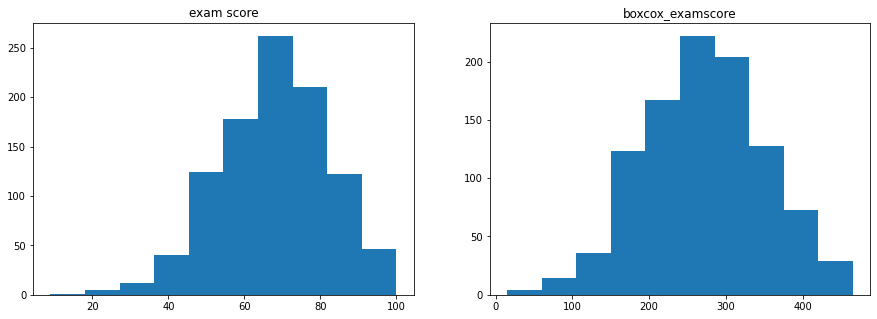

In [22]:
plt.figure(figsize=(15,5))
exam_score=(education_df['math score']+education_df['reading score']+education_df['writing score'])/3
plt.subplot(1,2,1)
plt.hist(exam_score)
plt.title('exam score')

plt.subplot(1,2,2)
boxcox_examscore,_=boxcox(exam_score)
plt.hist(boxcox_examscore)
plt.title('boxcox_examscore')

In [23]:
jarque_bera_test_stats=jarque_bera(exam_score)
normaltest_test_stats=normaltest(exam_score)

print('The statistic for exam score is {} and p value is {}'.format(jarque_bera_test_stats[0],jarque_bera_test_stats[1]))
print('The normaltest_stat statistic is {} and p value is {}'.format(normaltest_test_stats[0],normaltest_test_stats[1]))

The statistic for exam score is 15.453387913085168 and p value is 0.00044089934264401887
The normaltest_stat statistic is 15.186721327231322 and p value is 0.0005037851534494478


The variable is not normally distributed

In [24]:
jarque_bera_test_stats=jarque_bera(boxcox_examscore)
normaltest_test_stats=normaltest(boxcox_examscore)

print('The statistic for exam score is {} and p value is {}'.format(jarque_bera_test_stats[0],jarque_bera_test_stats[1]))
print('The normaltest_stat statistic is {} and p value is {}'.format(normaltest_test_stats[0],normaltest_test_stats[1]))

The statistic for exam score is 2.4353989331279 and p value is 0.2959101356398447
The normaltest_stat statistic is 2.779857602227616 and p value is 0.24909303914726724


After we apply boxcox the new variable is normally distributed